In [1]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn import preprocessing
import joblib

In [2]:
df = pd.read_csv('../datasets/Mall_Customers.csv')

In [3]:
# Map genders to numbers
gender_map = {'Male': 0, 'Female': 1}
pd.set_option('future.no_silent_downcasting', True)
df['Gender'] = df['Gender'].replace(gender_map)

In [4]:
# Define spending categories based on score thresholds
def categorize_spending(score):
    if score < 33:
        return 'Low'
    elif score <= 66:
        return 'Medium'
    else:
        return 'High'

In [5]:
# Apply the categorization function to create a new column 'Spending Category'
df['Spending Category'] = df['Spending Score (1-100)'].apply(categorize_spending)
df.drop(columns=['CustomerID'], inplace=True)
df.drop(columns=['Spending Score (1-100)'], inplace=True)

              precision    recall  f1-score   support

        High       0.30      0.86      0.44         7
         Low       0.00      0.00      0.00        13
      Medium       0.55      0.55      0.55        20

    accuracy                           0.42        40
   macro avg       0.28      0.47      0.33        40
weighted avg       0.33      0.42      0.35        40



Text(0.5, 1.0, 'SVM Linear Kernel Confusion Matrix')

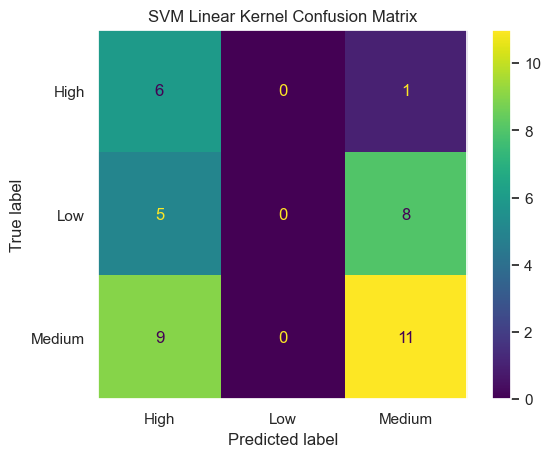

In [6]:
### Linear SVM ###
data = df.copy()
X = data.drop(columns=['Spending Category'])
y = data['Spending Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

svc_li = SVC(kernel='linear')

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
joblib.dump(scaler, "../models/scaler_svm_linear.pkl")

Z_svm_train = scaler.transform(X_train)
Z_svm_test = scaler.transform(X_test)

svc_li.fit(Z_svm_train, np.asarray(y_train))
joblib.dump(svc_li, "../models/svm_linear_model.pkl")
predictions = svc_li.predict(Z_svm_test)

print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, svc_li.predict(Z_svm_test))
ConfusionMatrixDisplay(cm,display_labels=svc_li.classes_).plot()
plt.grid(False)
plt.title('SVM Linear Kernel Confusion Matrix')